# Intro

## Links

https://canvas.northwestern.edu/courses/167719/assignments/1078600

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


## Modules

In [1]:
#For data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#For Isolation Forest from sklearn
from sklearn.ensemble import IsolationForest
from enum import auto

#Models from sklearn (Linear, Lasso, and Ridge)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#ElasticNet from sklearn
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RepeatedKFold 
from numpy import arange 

#Other from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#Other
from math import sqrt
import warnings

## Import Files

In [2]:
#Import train.csv and test.csv from the Kaggle page linked above
#from google.colab import files
#uploaded = files.upload()

In [3]:
df = pd.read_csv("train.csv")


# EDA

#### Intro Stats

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [6]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### EDA SalePrice Graphs

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

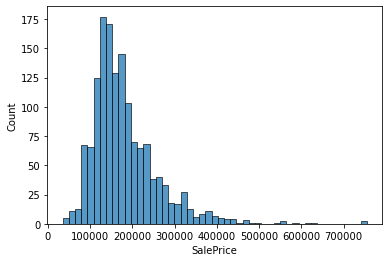

In [7]:
sns.histplot(x="SalePrice", data=df)

<AxesSubplot:xlabel='SalePrice'>

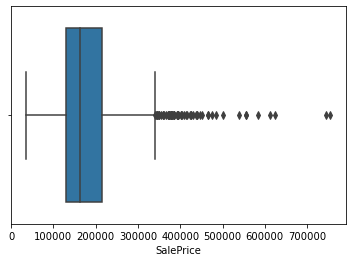

In [8]:
sns.boxplot(x="SalePrice", data=df)

#### Investigate Missing Data and Outliers

##### Missing Data:

In [9]:
#Toggle this to see results below
pd.set_option('max_rows', 20)

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

The following categories have null values: 

*   LotFrontage
*   Alley
*   MasVnrType
*   MasVnrArea
*   BsmtQual
*   BsmtCond
*   BsmtExposure
*   BsmtFinType1
*   BsmtFinType2
*   Electrical
*   FireplaceQu
*   GarageType
*   GarageYrBlt
*   GarageFinish
*   GarageQual
*   GarageCond
*   PoolQC
*   Fence
*   MiscFeature

We're not concerned about most of these columns having null values. It makes sense that some of the data would be missing for each (if a house doesn't have a pool, for example). We're going to drop all of the columns that have null values with the exception of "Electrical." For 'Electrical,' we'll remove the row with the null value. 

In [11]:
col_to_drop = ['LotFrontage','Alley','MasVnrType','MasVnrArea',
               'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 

df2a = df.drop(columns=col_to_drop, inplace=False)

col_to_drop_2 = ['MSZoning', 'Street','LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 
                'Heating', 'HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                'PavedDrive', 'SaleType', 'SaleCondition'] 
df2b = df2a.drop(columns= col_to_drop_2, inplace=False)


df3 = df2b.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

##### Removing Anomolies

In [12]:
#Isolation Forest Removes anomalies
model=IsolationForest(n_estimators=100, contamination=float(.05), random_state=42)

model.fit(df3[['SalePrice']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [13]:
df3['scores'] = model.decision_function(df3[['SalePrice']])

df3['anomaly_score'] = model.predict(df3[['SalePrice']])

df4 = df3[df3['anomaly_score']!=-1]

df4.shape

(1387, 37)

##### EDA SalePrice Stats/Graphs (Cleaned Data)

In [14]:
df4["SalePrice"].describe()

count      1387.000000
mean     173354.517664
std       59601.459217
min       72500.000000
25%      130000.000000
50%      160200.000000
75%      206600.000000
max      361919.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

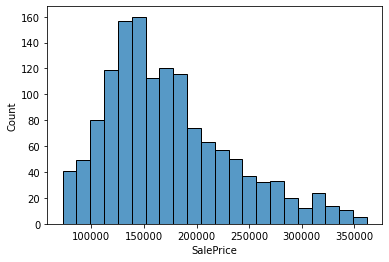

In [15]:
sns.histplot(x="SalePrice", data=df4)

<AxesSubplot:xlabel='SalePrice'>

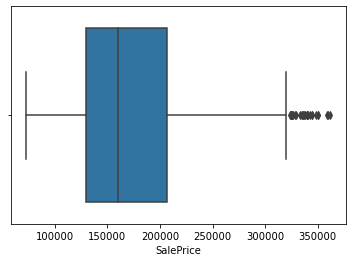

In [16]:
sns.boxplot(x="SalePrice", data=df4)

####Feature Engineering

In [17]:
# sum 1st floor, 2nd floor, and basement square footage to get total square footage
sum_column = df4['1stFlrSF'] + df4['2ndFlrSF'] + df4['TotalBsmtSF']

# multiply total square footage by overall quality to generate new predictor variable qual_space
mult_column = sum_column*df4['OverallQual']

#Sum the baths and the halfbaths
bath_column = df4['FullBath'] + 0.5*df4['HalfBath']

#Create a newness score (YearBuilt + (YearRemodAdd/YearBuilt))
newness_column = df4['YearBuilt'] + (df4['YearRemodAdd'] / df4['YearBuilt'])



# add new predictor variables to dataframe
df4['tot_sq'] = sum_column
df4['qual_space'] = mult_column
df4['baths'] = bath_column
df4['newness_value'] = newness_column
df4.head()

<ipython-input-17-d7942eafcf14>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tot_sq'] = sum_column
<ipython-input-17-d7942eafcf14>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['qual_space'] = mult_column
<ipython-input-17-d7942eafcf14>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MiscVal,MoSold,YrSold,SalePrice,scores,anomaly_score,tot_sq,qual_space,baths,newness_value
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,2,2008,208500,0.157790,1,2566,17962,2.5,2004.000000
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,5,2007,181500,0.190851,1,2524,15144,2.0,1977.000000
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,9,2008,223500,0.155139,1,2706,18942,2.5,2002.000500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,2,2006,140000,0.213389,1,2473,17311,1.0,1916.028721
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,12,2008,250000,0.121703,1,3343,26744,2.5,2001.000000


#### Correlations

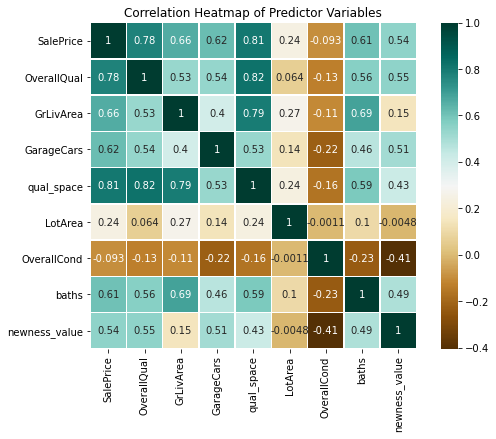

In [18]:
# setting the columns to correlate

columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'qual_space', 'LotArea', 'OverallCond', 'baths', 'newness_value']
df_corr = df4[columns]
# running the correlation
df_corr.corr()

# setting up the heatmap
corrmat = df_corr.corr()

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=1, square=True, annot=True, cmap='BrBG', linewidths=.5 )
plt.title('Correlation Heatmap of Predictor Variables')

# images can be saved - default is .png
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('Correlation Heatmap of New Predictor Variables')

## Graphs

### Scatterplots

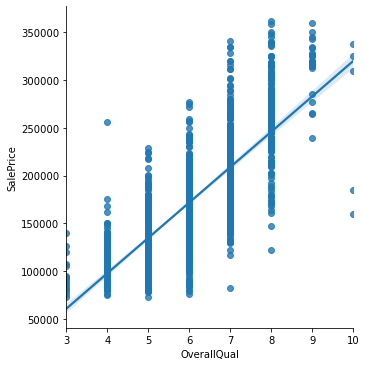

In [19]:
#sns.scatterplot(x='OverallQual', y='SalePrice', data=df4)
sns.lmplot(x='OverallQual', y='SalePrice', data=df4)

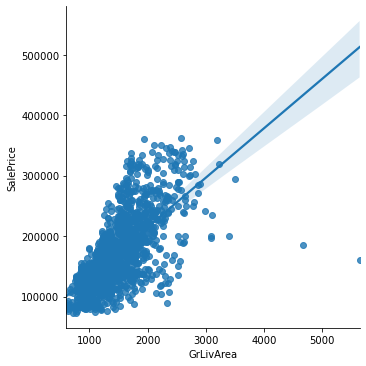

In [20]:
#sns.scatterplot(x="GrLivArea", y="SalePrice", data=df4)
sns.lmplot(x="GrLivArea", y="SalePrice", data=df4)

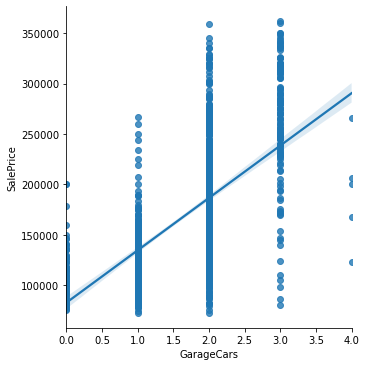

In [21]:
#sns.scatterplot(x="GarageCars", y="SalePrice", data=df4)
sns.lmplot(x="GarageCars", y="SalePrice", data=df4)

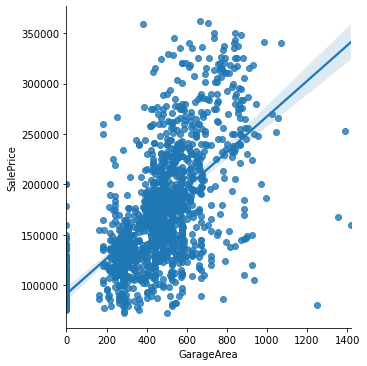

In [22]:
#sns.scatterplot(x="GarageArea", y="SalePrice", data=df4)
sns.lmplot(x="GarageArea", y="SalePrice", data=df4)

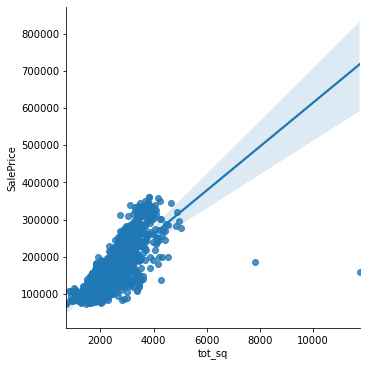

In [23]:
#scatterplot total square ft vs. SalePrice
sns.lmplot(x="tot_sq", y="SalePrice", data=df4)

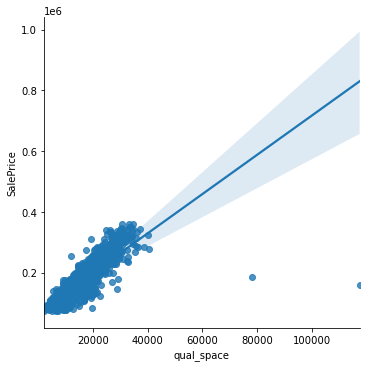

In [24]:
#scatterplot qual_space vs. SalePrice
sns.lmplot(x="qual_space", y="SalePrice", data=df4)

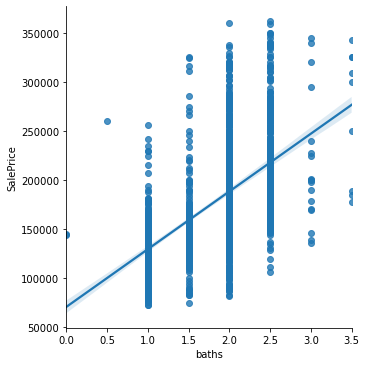

In [25]:
#scatterplot baths vs. SalePrice
sns.lmplot(x="baths", y="SalePrice", data=df4)

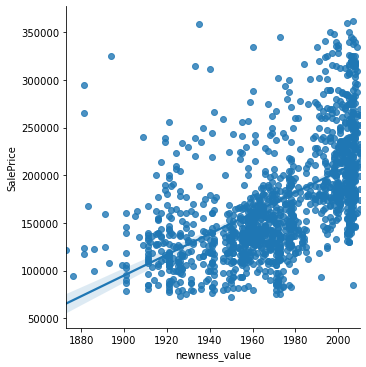

In [26]:
# scatterplot of newness value vs SalePrice
sns.lmplot(x="newness_value", y="SalePrice", data=df4)

### Boxplots

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

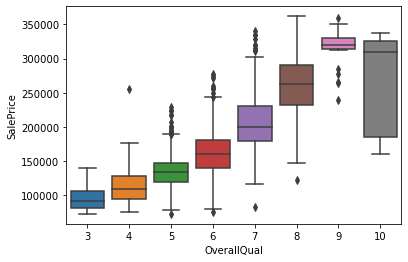

In [27]:
var = 'OverallQual'
data = pd.concat([df4['SalePrice'], df4[var]], axis=1)
sns.boxplot(x=var, y='SalePrice', data=data)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

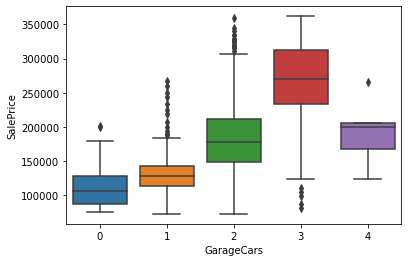

In [28]:
var = 'GarageCars'
data = pd.concat([df4['SalePrice'], df4[var]], axis=1)
sns.boxplot(x=var, y='SalePrice', data=data)

<AxesSubplot:xlabel='baths', ylabel='SalePrice'>

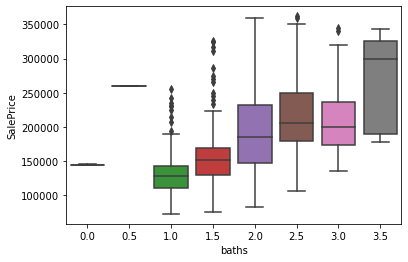

In [29]:
# side by side boxplot of baths vs. SalePrice
var = 'baths'
data = pd.concat([df4['SalePrice'], df4[var]], axis=1)
sns.boxplot(x=var, y='SalePrice', data=data)

# Regression Models

## Lasso, Ridge, and ElasticNet

### Variable Selection

In [30]:
z = df4.drop(columns = ['SalePrice', 'Id', 'scores', 'anomaly_score'])
y = df4['SalePrice']

In [31]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector = selector.fit(z, y)

df_ranks = selector.ranking_
df_ranks

array([ 1, 24,  1,  1,  1,  1, 13, 18, 19,  6, 23, 16,  3,  1,  1, 21, 11,
       14,  1,  4, 25,  1,  9,  2,  8,  5, 10, 17,  1, 15, 26,  1,  7, 22,
       20, 12,  1])

In [32]:
for i in range(z.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 24.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 13.000
Column: 7, Selected False, Rank: 18.000
Column: 8, Selected False, Rank: 19.000
Column: 9, Selected False, Rank: 6.000
Column: 10, Selected False, Rank: 23.000
Column: 11, Selected False, Rank: 16.000
Column: 12, Selected False, Rank: 3.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 21.000
Column: 16, Selected False, Rank: 11.000
Column: 17, Selected False, Rank: 14.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 4.000
Column: 20, Selected False, Rank: 25.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 9.000
Column: 23, Selected False, Rank: 2.000
Column: 24, Selected False, Rank: 8.000
Column: 2

In [33]:
cols_to_keep = selector.support_

columns_to_remove = z.columns.values[np.logical_not(cols_to_keep)]
columns_to_remove

array(['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'tot_sq',
       'qual_space', 'baths'], dtype=object)

In [34]:
X = z.drop(columns=columns_to_remove)

In [35]:
name_list = list(X.columns.values)

In [36]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Lasso

In [37]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252181185368.77197, tolerance: 391652989.5874466
  model = cd_fast.enet_coordinate_descent(


In [38]:
# display model coefficients and r-sqaured scores
print('Coefficient:', lasso_model.coef_)
print('Scores:', lasso_model.score(X_train, y_train), lasso_model.score(X_test, y_test))

Coefficient: [ -184.8503518  16919.65968894  4601.01154766   773.00000906
   242.8726669     47.86135961 12663.89886906  -146.81819531
  9517.1057251     38.50881059   441.93502156  -261.3806402 ]
Scores: 0.7850997031385983 0.8452896114591302


In [39]:
y_prediction = lasso_model.predict(X_test)

In [40]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

23671.36807136452


In [41]:
# K-fold CV
score_lasso = cross_val_score(lasso_model, X_train, y_train, cv=10)
score_lasso

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159442389699.83508, tolerance: 349942370.4286453
  model = cd_fast.enet_coordinate_descent(
C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240491473312.28214, tolerance: 358098534.9982602
  model = cd_fast.enet_coordinate_descent(
C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257471428599.45276, tolerance: 352103963.30287695
  model = cd_fast.enet_coordinate_descent(
C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

array([0.21617453, 0.81793705, 0.814242  , 0.80530174, 0.84199673,
       0.77720259, 0.83293262, 0.86101777, 0.84267756, 0.83439144])

In [42]:
print("CV mean score:", score_lasso.mean())
print("CV mean std dev score:", score_lasso.std())

CV mean score: 0.7643874019363353
CV mean std dev score: 0.1840699886195586


#### Ridge

In [43]:
ridge_model = Ridge().fit(X_train, y_train)

In [44]:
# display model coefficients and r-sqaured scores
print('Coefficient:', ridge_model.coef_)
print('Scores:', ridge_model.score(X_train, y_train), ridge_model.score(X_test, y_test))

Coefficient: [ -184.89174119 16898.96824051  4600.54796505   110.86242785
   242.67866877    47.90472505 12623.20965672  -159.96286104
  9500.41241026    38.55707027   441.83585603   401.52193551]
Scores: 0.7850995219712469 0.8452618243769616


In [45]:
y_prediction = ridge_model.predict(X_test)

In [46]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

23673.493748650915


In [47]:
# K-fold CV
score_ridge = cross_val_score(ridge_model, X, y, cv=10)
score_ridge

array([0.85424213, 0.82381643, 0.84794958, 0.69904866, 0.80175182,
       0.84572206, 0.86013341, 0.84208571, 0.45201179, 0.80802269])

In [48]:
print("CV mean score:", score_ridge.mean())
print("CV mean std dev score:", score_ridge.std())

CV mean score: 0.783478428785822
CV mean std dev score: 0.11912645070598336


#### ElasticNet

In [49]:
# assigning the 3 predictor variables with the highest correlation coefficient
y = df4['SalePrice']
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
elasticnet_model = ElasticNetCV().fit(X_train, y_train)
print('alpha: %f' % elasticnet_model.alpha_)
print('l1_ratio_: %f' % elasticnet_model.l1_ratio_)

alpha: 38192.218001
l1_ratio_: 0.500000


In [51]:
# display model coefficients and r-sqaured scores
print('Coefficient:', elasticnet_model.coef_)
print('Scores:', elasticnet_model.score(X_train, y_train), elasticnet_model.score(X_test, y_test))

Coefficient: [-17.22392455   0.60378846  -0.          37.30089983  20.67096224
  74.35217833   0.          -0.           0.           6.05083074
   0.          37.29217547]
Scores: 0.4777999630212376 0.47266375696458496


In [52]:
y_prediction = elasticnet_model.predict(X_test)

In [53]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

43702.615614180504


In [54]:
# K-fold CV
score_en = cross_val_score(elasticnet_model, X_train, y_train, cv=10)
score_en

array([0.19161431, 0.44163616, 0.4326376 , 0.44292176, 0.59162816,
       0.56427655, 0.56562971, 0.48415912, 0.50829106, 0.4319808 ])

In [55]:
print("CV mean score:", score_en.mean())
print("CV mean std dev score:", score_en.std())

CV mean score: 0.4654775219223496
CV mean std dev score: 0.10778052509578841


#### Tuning hyperparameters for ElasticNetCV():

In [56]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [57]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 

# define model 
ratios = arange(0, 1, 0.01) 

alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0] 

model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1);

# fit model 
model.fit(X_train, y_train)
elasticnet_tuned_model = model.fit(X_train, y_train)

warnings.filterwarnings("ignore")

In [58]:
# summarize chosen configuration 
print('alpha: %f' % elasticnet_tuned_model.alpha_)
print('l1_ratio_: %f' % elasticnet_tuned_model.l1_ratio_)

alpha: 0.100000
l1_ratio_: 0.750000


In [59]:
score_en_2 = cross_val_score(elasticnet_tuned_model, X_train, y_train, scoring='r2', cv=10)
warnings.filterwarnings("ignore")

In [60]:
print("CV mean score:", score_en_2.mean())
print("CV mean std dev score:", score_en_2.std())

CV mean score: 0.7648433160971997
CV mean std dev score: 0.18398241474890692


## Linear Regression Models

#### Liner Regression Model One ([OverallQual] [GRliveArea] [GarageCars])

In [61]:
# assigning the 3 predictor variables with the highest correlation coefficient
features = ['OverallQual', 'GrLivArea', 'GarageCars']

In [62]:
X = df4[features]

In [63]:
y = df4['SalePrice']

In [64]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# creating linear regression model
model_1 = LinearRegression().fit(X_train, y_train)

In [66]:
# display model coefficients and r-sqaured scores
print('Coefficient:', model_1.coef_)
print('Scores:', model_1.score(X_train, y_train), model_1.score(X_test, y_test))

Coefficient: [22538.88119918    38.51336476 20167.98961928]
Scores: 0.7206411884255531 0.7741153103217534


In [67]:
# predicted housing prices
y_prediction = model_1.predict(X_test)

In [68]:
# model RMSE 
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

28602.699133713417


In [69]:
# k-fold CV
scores_1 = cross_val_score(model_1, X_train, y_train, scoring='r2', cv=5)
scores_1

array([0.49854734, 0.7155773 , 0.7375631 , 0.77589921, 0.78229407])

In [70]:
print("mean cv score:", scores_1.mean())
print("std dev cv score:", scores_1.std())

mean cv score: 0.7019762044171018
std dev cv score: 0.10464252297556577


#### Liner Regression Model Two ([OverallQual])

In [71]:
x = df4['OverallQual'].values.reshape((-1, 1))
y = df4['SalePrice']

# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creating linear regression model
model_2 = LinearRegression().fit(X_train, y_train)

# display model coefficients and r-sqaured scores
print('Coefficient:', model_2.coef_)
print('Scores:', model_2.score(X_train, y_train), model_2.score(X_test, y_test))

# predicted housing prices
y_prediction = model_2.predict(X_test)

# model RMSE 
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('RMSE:', RMSE)

Coefficient: [37061.76313825]
Scores: 0.5904688256569957 0.6768312441106439
RMSE: 34211.9873818558


In [72]:
# k-fold CV
scores_2 = cross_val_score(model_2, X_train, y_train, scoring='r2', cv=5)
scores_2

array([0.45569586, 0.58430409, 0.58196803, 0.63339208, 0.65503852])

In [73]:
print("mean cv score:", scores_2.mean())
print("std dev cv score:", scores_2.std())

mean cv score: 0.5820797157345505
std dev cv score: 0.06918639380526288


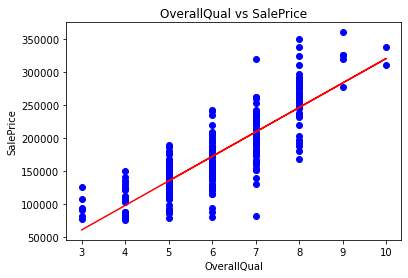

In [74]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_train, model_2.predict(X_train), color = "red")
plt.title("OverallQual vs SalePrice")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

#### Liner Regression Model Three ([qual_space])

In [75]:
x = df4['qual_space'].values.reshape((-1, 1))
y = df4['SalePrice']

# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creating linear regression model
model_3 = LinearRegression().fit(X_train, y_train)

# display model coefficients and r-sqaured scores
print('Coefficient:', model_3.coef_)
print('Scores:', model_3.score(X_train, y_train), model_3.score(X_test, y_test))

# predicted housing prices
y_prediction = model_3.predict(X_test)

# model RMSE 
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

Coefficient: [6.18124111]
Scores: 0.6121381394496235 0.7881827084140843
27697.739433000243


In [76]:
# k-fold CV
scores_3 = cross_val_score(model_3, X_train, y_train, scoring='r2', cv=5)
scores_3

array([-0.48826011,  0.72447673,  0.72755186,  0.76212847,  0.73907445])

In [77]:
print("mean cv score:", scores_3.mean())
print("std dev cv score:", scores_3.std())

mean cv score: 0.49299427905186183
std dev cv score: 0.490805507437618


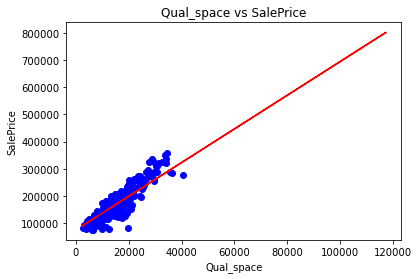

In [78]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_train, model_3.predict(X_train), color = "red")
plt.title("Qual_space vs SalePrice")
plt.xlabel("Qual_space")
plt.ylabel("SalePrice")
plt.show()

#### Liner Regression Model Four ([qual_space] and [GarageCars])

In [79]:
features_2 = ['qual_space', 'GarageCars']

In [80]:
x = df4[features_2]

In [81]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
# creating linear regression model
model_4 = LinearRegression().fit(X_train, y_train)

# display model coefficients and r-sqaured scores
print('Coefficient:', model_4.coef_)
print('Scores:', model_4.score(X_train, y_train), model_4.score(X_test, y_test))

Coefficient: [4.98130032e+00 2.37770262e+04]
Scores: 0.6740395847353984 0.7992757120508557


In [83]:
# predicted housing prices
y_prediction = model_4.predict(X_test)

# model RMSE
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

26962.7126297012


In [84]:
# k-fold CV
scores_4 = cross_val_score(model_4, X_train, y_train, scoring='r2', cv=5)
scores_4

array([-0.24877286,  0.76434323,  0.73928354,  0.77900656,  0.77871593])

In [85]:
print("mean cv score:", scores_4.mean())
print("std dev cv score:", scores_4.std())

mean cv score: 0.5625152805883451
std dev cv score: 0.405901757942075


When comparing the linear regression models above, the final model using [OverallQual] and [GarageCars] produced the lowest Root Mean Square Error (RMSE). However, the results appear to have slight instability. Using k-fold cross validation, Model 1 has the highest mean score and lowest standard deviation.

# Testing

In [86]:
# create dataframe using test data from kaggle
df_test = pd.read_csv("test.csv")

In [87]:
# replace NaN values with zero for the test data
df_test = df_test.fillna(0)

In [88]:
# sum 1st floor, 2nd floor, and basement square footage to get total square footage
sum_column = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['TotalBsmtSF']

# multiply total square footage by overall quality to generate new predictor variable qual_space
mult_column = sum_column*df_test['OverallQual']

#Sum the baths and the halfbaths
bath_column = df_test['FullBath'] + 0.5*df_test['HalfBath']

#Create a newness score (YearBuilt + (YearRemodAdd/YearBuilt))
newness_column = df_test['YearBuilt'] + (df_test['YearRemodAdd'] / df_test['YearBuilt'])

# add new predictor variables to dataframe
df_test['tot_sq'] = sum_column
df_test['qual_space'] = mult_column
df_test['baths'] = bath_column
df_test['newness_value'] = newness_column

## Linear Regression Model One

In [89]:
features_test = ['OverallQual', 'GrLivArea', 'GarageCars']

In [90]:
X = df_test[features_test]

In [91]:
test_prediction_linear = model_1.predict(X)

## Lasso, Ridge, and ElasticNet

In [92]:
X = df_test[name_list]

In [93]:
test_prediction_lasso = lasso_model.predict(X)
test_prediction_ridge = ridge_model.predict(X)
test_prediction_elasticnet = elasticnet_tuned_model.predict(X)

In [94]:
#from google.colab import files

df_linear = pd.DataFrame({'id':df_test['Id'], 'SalePrice':test_prediction_linear})
df_lasso = pd.DataFrame({'id':df_test['Id'], 'SalePrice':test_prediction_lasso})
df_ridge = pd.DataFrame({'id':df_test['Id'], 'SalePrice':test_prediction_ridge})
df_elasticnet = pd.DataFrame({'id':df_test['Id'], 'SalePrice':test_prediction_elasticnet})

df_linear.to_csv('group_5_linear_m3.csv', index=False)
df_lasso.to_csv('group_5_lasso_m3.csv', index=False)
df_ridge.to_csv('group_5_ridge_m3.csv', index=False)
df_elasticnet.to_csv('group_5_elasticnet_m3.csv', index=False)

# files.download('group_5_linear_m3.csv')
# files.download('group_5_lasso_m3.csv')
# files.download('group_5_ridge_m3.csv')
# files.download('group_5_elasticnet_m3.csv')